In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [4]:
# 1. Last inn data
df = pd.read_csv("../data/data2.csv")
df.columns

Index(['alder', 'lonn', 'utdanning', 'sko_str', 'avdeling', 'er_leder',
       'favorittfarge', 'ansiennitet', 'prestasjonsscore'],
      dtype='object')

=== Beskrivende statistikk ===

alder:
  Mean: 31.69
  Median: 32.00
  Std: 7.23


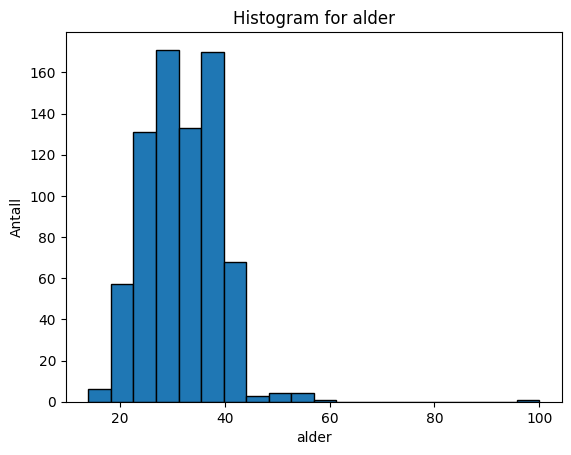


lonn:
  Mean: 890029.70
  Median: 704614.00
  Std: 371359.16


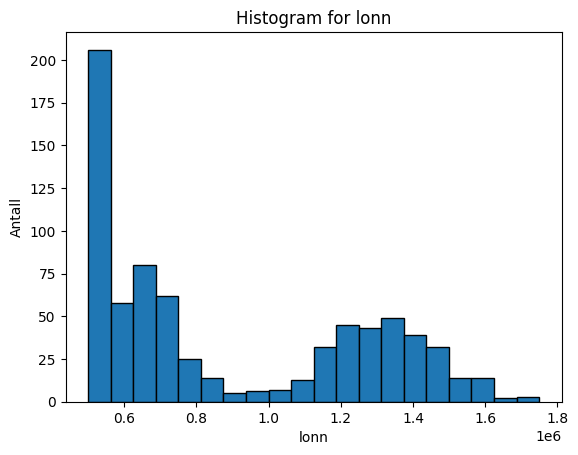


utdanning:
  Mean: 11.97
  Median: 12.00
  Std: 2.36


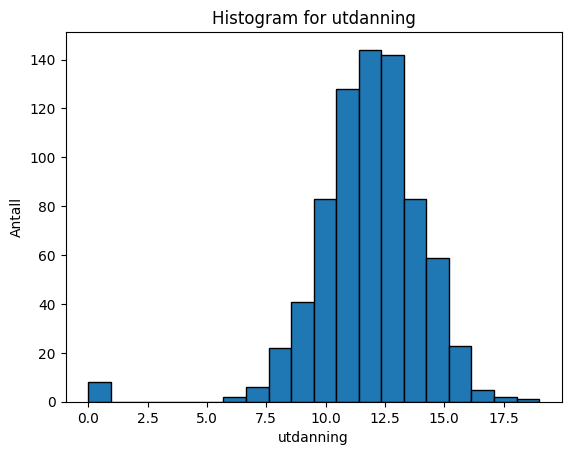


sko_str:
  Mean: 43.57
  Median: 43.00
  Std: 2.90


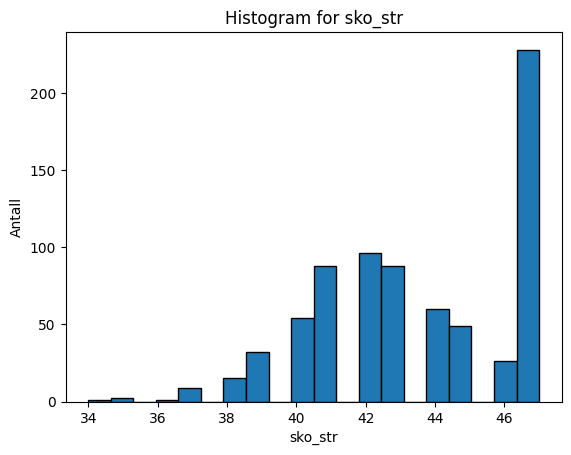


prestasjonsscore:
  Mean: 2.95
  Median: 3.00
  Std: 0.97


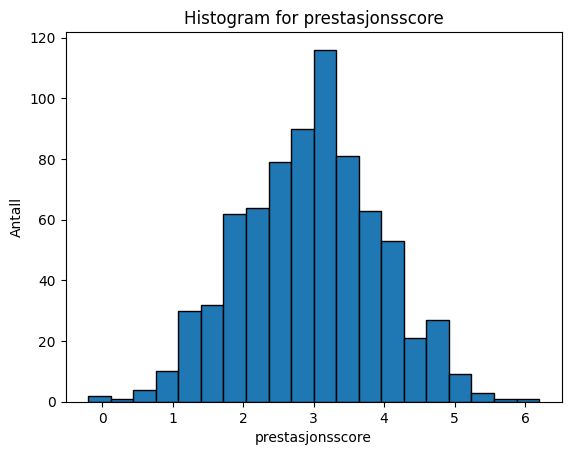

In [23]:
# ---- 1. Beskrivende statistikk og uteliggere ----
print("=== Beskrivende statistikk ===")
for col in ["alder", "lonn", "utdanning", "sko_str","prestasjonsscore" ]:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")

    # Histogram
    plt.hist(df[col], bins=20, edgecolor="black")
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Antall")
    plt.show()

In [24]:
print("\n=== Korrelasjoner mot lønn ===")

# Vel numeriske kolonner
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Fjern lønn sjølv frå forklaringsvariablane
explanatory_vars = numeric_cols.drop("lonn")

# Korrelasjon mellom kvar forklaringsvariabel og lønn
corr_with_lonn = (
    df[explanatory_vars]
    .corrwith(df["lonn"])
    .sort_values(key=lambda x: abs(x), ascending=False)
)

print(corr_with_lonn)



=== Korrelasjoner mot lønn ===
alder               0.574920
ansiennitet         0.565564
sko_str            -0.416981
er_leder            0.221427
prestasjonsscore    0.145236
utdanning           0.061272
dtype: float64


In [22]:
# Fjern selv-korrelasjoner
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
top3 = corr_pairs[:5]
print(top3)

lonn         alder          0.574920
alder        lonn           0.574920
lonn         ansiennitet    0.565564
ansiennitet  lonn           0.565564
             alder          0.559458
dtype: float64



=== Gjennomsnittlig lønn per avdeling ===
avdeling
Utvikling    1.336790e+06
Finans       9.347135e+05
HR           6.868998e+05
Salg         5.626173e+05
Name: lonn, dtype: float64


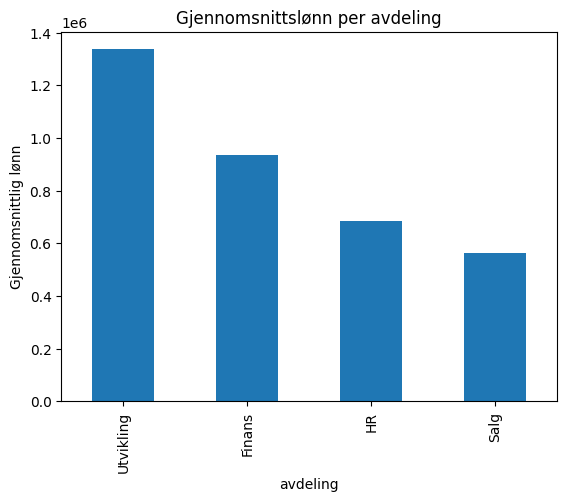

In [18]:

print("\n=== Gjennomsnittlig lønn per avdeling ===")
dept_salary = df.groupby("avdeling")["lonn"].mean().sort_values(ascending=False)
print(dept_salary)

dept_salary.plot(kind="bar")
plt.title("Gjennomsnittslønn per avdeling")
plt.ylabel("Gjennomsnittlig lønn")
plt.show()


=== Gjennomsnittlig lønn per avdeling ===
favorittfarge
groen    919995.450893
blaa     878708.492593
roed     875694.000000
Name: lonn, dtype: float64


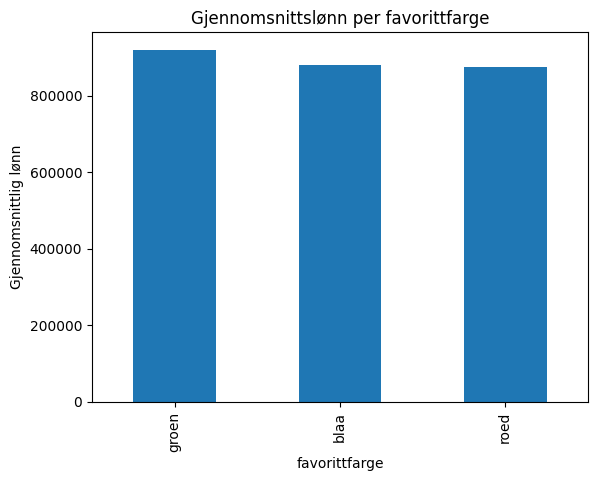

In [26]:

print("\n=== Gjennomsnittlig lønn per avdeling ===")
dept_salary = df.groupby("favorittfarge")["lonn"].mean().sort_values(ascending=False)
print(dept_salary)

dept_salary.plot(kind="bar")
plt.title("Gjennomsnittslønn per favorittfarge")
plt.ylabel("Gjennomsnittlig lønn")
plt.show()

In [7]:
features = ["alder", "education_years", "shoe_size"]
df=df.dropna()
X = df[features]
y = df["salary"]

model = LinearRegression()
model.fit(X, y)

print("Koefisienter:")
for f, coef in zip(features, model.coef_):
    print(f"  {f}: {coef:.3f}")
print(f"Intercept: {model.intercept_:.3f}")

# Prediksjonseksempel
y_pred = model.predict(X)
print("\nFørste 5 prediksjoner vs faktiske verdier:")
print(pd.DataFrame({"Pred": y_pred[:5], "Faktisk": y[:5]}))

Koefisienter:
  age: -3.696
  education_years: 2445.463
  shoe_size: 734.666
Intercept: 28264.619

Første 5 prediksjoner vs faktiske verdier:
           Pred        Faktisk
0  86641.994684  104149.582987
1  93724.782102  103639.346797
2  82024.500760   79898.402214
3  85910.509372   75867.274392
4  92077.929648  102361.234472
